In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_cities_complete.csv')

# Initial data inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74429 entries, 0 to 74428
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   74429 non-null  object 
 1   Bedrooms   74429 non-null  float64
 2   Bathrooms  74429 non-null  float64
 3   Area       74429 non-null  float64
 4   Type       74429 non-null  object 
 5   Stratum    74429 non-null  float64
 6   Price      74429 non-null  float64
dtypes: float64(5), object(2)
memory usage: 4.0+ MB


From the execution of info() it was noticed that:

1. The dataset is large (several thousands of rows).
2. Bedrooms and bathrooms are labeled as 'float64' instead of int64'.
3. Categorical variables are labeled as 'object'.

All above was fixed in the next line of code.

In [6]:
df[['Location', 'Type', 'Stratum']] = df[['Location', 'Type', 'Stratum']].astype('category')
df[['Bedrooms', 'Bathrooms']] = df[['Bedrooms', 'Bathrooms']].astype('int64')

In [7]:
df.describe(include = np.number)

,Bedrooms,Bathrooms,Area,Price
count,74429.000000,74429.000000,74429.000000,7.442900e+04
mean,3.448965,2.964503,164.367330,1.535977e+03
std,2.541554,1.634891,132.903712,6.785334e+04
min,1.000000,1.000000,-53.715196,1.000000e-06
25%,3.000000,2.000000,81.000000,2.950000e+02
50%,3.000000,3.000000,120.000000,5.000000e+02
75%,4.000000,4.000000,200.000000,9.000000e+02
max,425.000000,90.000000,996.000000,1.646932e+07


In [8]:
df.describe(exclude = np.number)

,Location,Type,Stratum
count,74429,74429,74429.0
unique,20,2,6.0
top,Medellin,Apartment,6.0
freq,9911,40957,26275.0


From the describe() for both kind of data can be confirmed that:

1. Bedrooms and Bathrooms clearly have outliers.
2. The maximum price (16493200 million pesos) could be an outlier.
3. The most frequent Stratum is 6, which means there are a lot of property offers for wealthy people.

# Univariate analysis

## Numerical Variables

### Boxplot Analysis of Discrete Variables

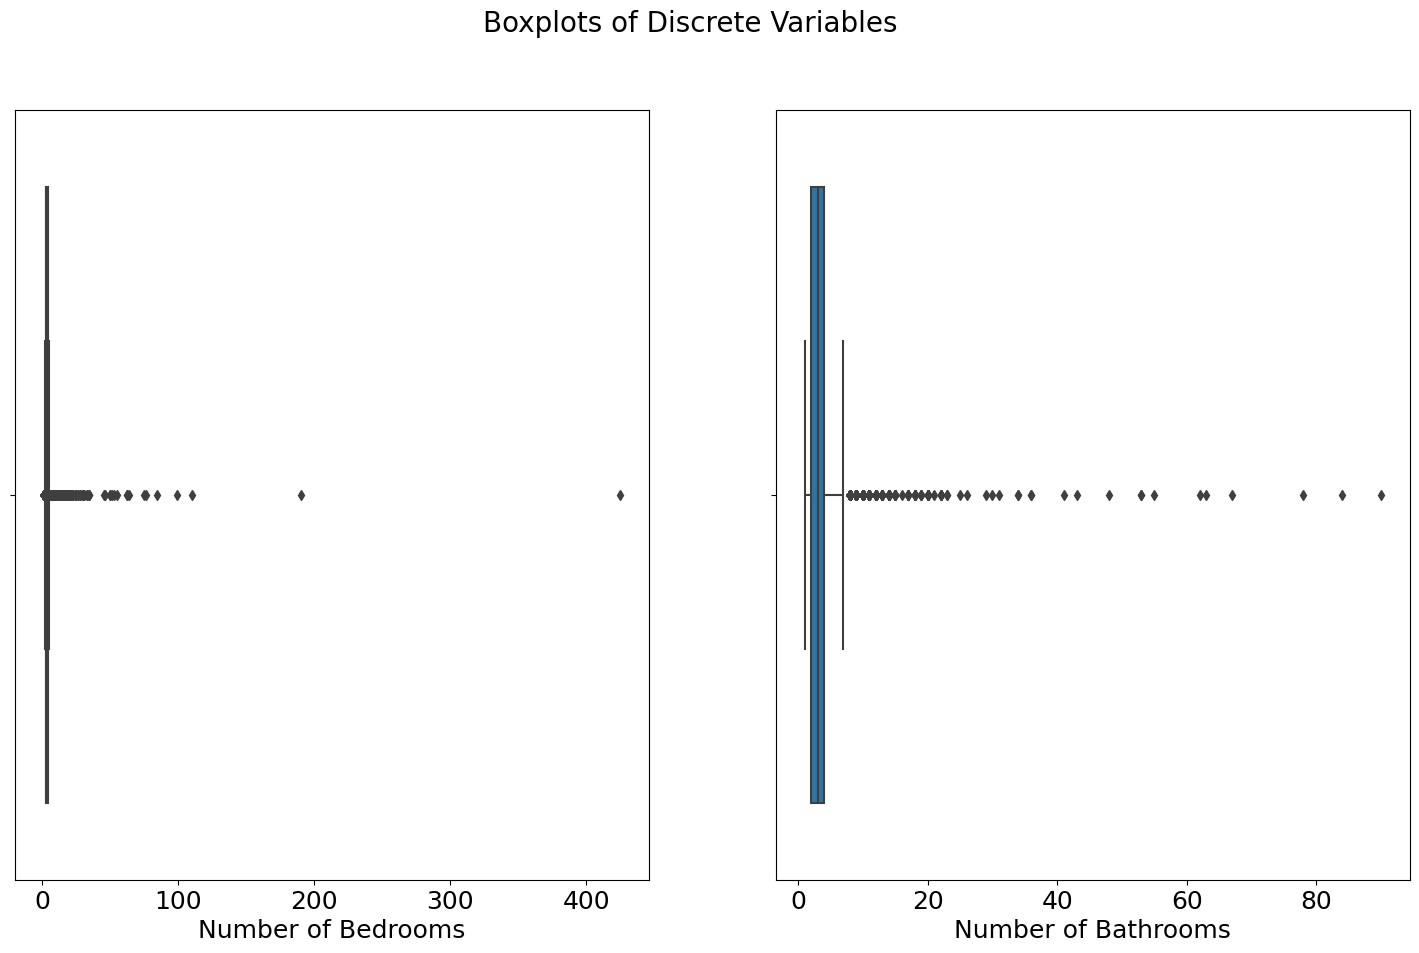

In [13]:
# Define general title and subplots
fig, axes = plt.subplots(1, 2, figsize = (18, 10))  
plt.suptitle('Boxplots of Discrete Variables', fontsize = 20)

# Bedrooms plot
sns.boxplot(x = df.Bedrooms, ax = axes[0])
axes[0].set_title('', fontsize = 18)
axes[0].set_xlabel('Number of Bedrooms', fontsize = 18)  
axes[0].set_ylabel('')  
axes[0].tick_params(axis = 'x', labelsize = 18)

# Bathrooms plot
sns.boxplot(x = df.Bathrooms, ax = axes[1])
axes[1].set_title('', fontsize = 18)
axes[1].set_xlabel('Number of Bathrooms', fontsize = 18)  
axes[1].set_ylabel('') 
axes[1].tick_params(axis = 'x', labelsize=18)

plt.tight_layout
plt.show()

The boxplots showed in detail the outliers: it's unreal for normal people to have available a house or apartment with more than 50 bedrooms or 20 bathrooms. Therefore, the function remove_outliers_iqr was built to drop all those points.

In [15]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(x, column):
    Q1 = x[column].quantile(0.25)  
    Q3 = x[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR    
    return x[(x[column] >= lower_bound) & (x[column] <= upper_bound)]  


# Remove outliers from 'Bedrooms' and 'Bathrooms'
df = remove_outliers_iqr(df, 'Bedrooms')
df = remove_outliers_iqr(df, 'Bathrooms')

### Countplot Analysis of Discrete Variables 

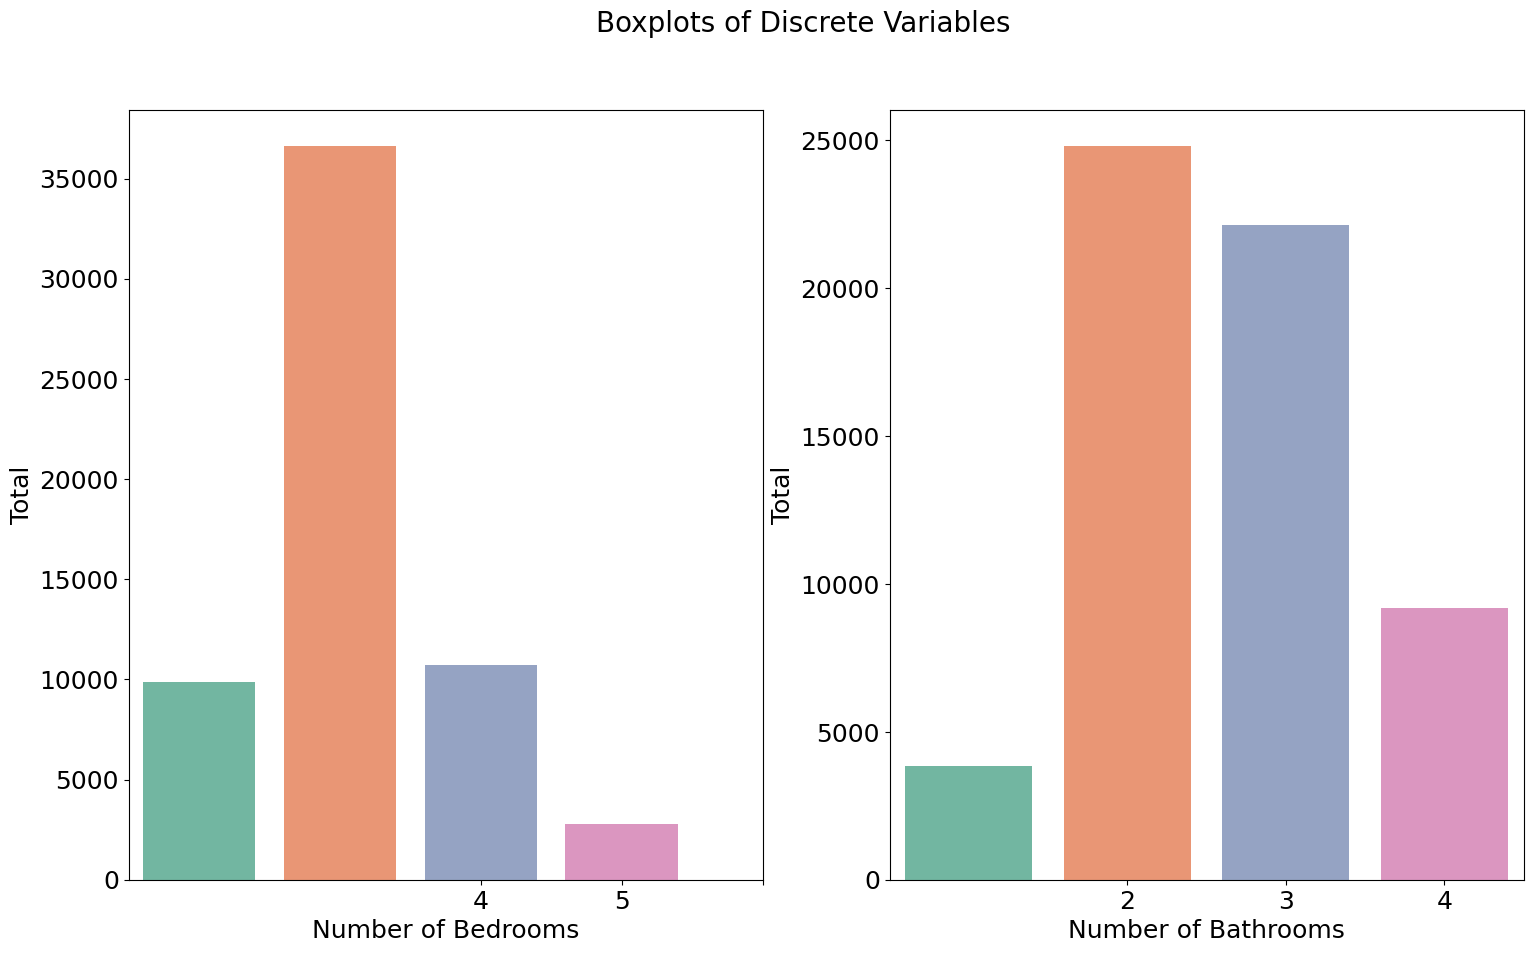

In [17]:
# Define subplots and general title
fig, axes = plt.subplots(1, 2, figsize = (18, 10))  
plt.suptitle('Boxplots of Discrete Variables', fontsize = 20)

# Bedrooms plot
sns.countplot(x = df.Bedrooms, ax = axes[0], palette = 'Set2')
axes[0].set_title('', fontsize = 18)
axes[0].set_xlabel('Number of Bedrooms', fontsize = 18)  
axes[0].set_ylabel('Total', fontsize = 18)  
axes[0].tick_params(axis = 'x', labelsize = 18)
axes[0].tick_params(axis = 'y', labelsize = 18)
bedroom_ticks = range(df['Bedrooms'].min(), df['Bedrooms'].max() , 1)  
axes[0].set_xticks(bedroom_ticks)

# Bathrooms plot
sns.countplot(x = df.Bathrooms, ax = axes[1], palette = 'Set2')
axes[1].set_title('', fontsize = 18)
axes[1].set_xlabel('Number of Bathrooms', fontsize = 18)  
axes[1].set_ylabel('Total', fontsize = 18) 
axes[1].tick_params(axis = 'x', labelsize=18)
axes[1].tick_params(axis = 'y', labelsize = 18)
bathroom_ticks = range(df['Bathrooms'].min(), df['Bathrooms'].max() , 1)  
axes[1].set_xticks(bathroom_ticks)

plt.tight_layout
plt.show()

* For bedrooms there is a clearly more frequent number (5), while for bathrooms  2 and 3 are close as the most frequents ones.
* Also, it can be noticed is less common to find properties with only 1  bedroom or bathroom.

### KDE plot Analysis of Continous Variables

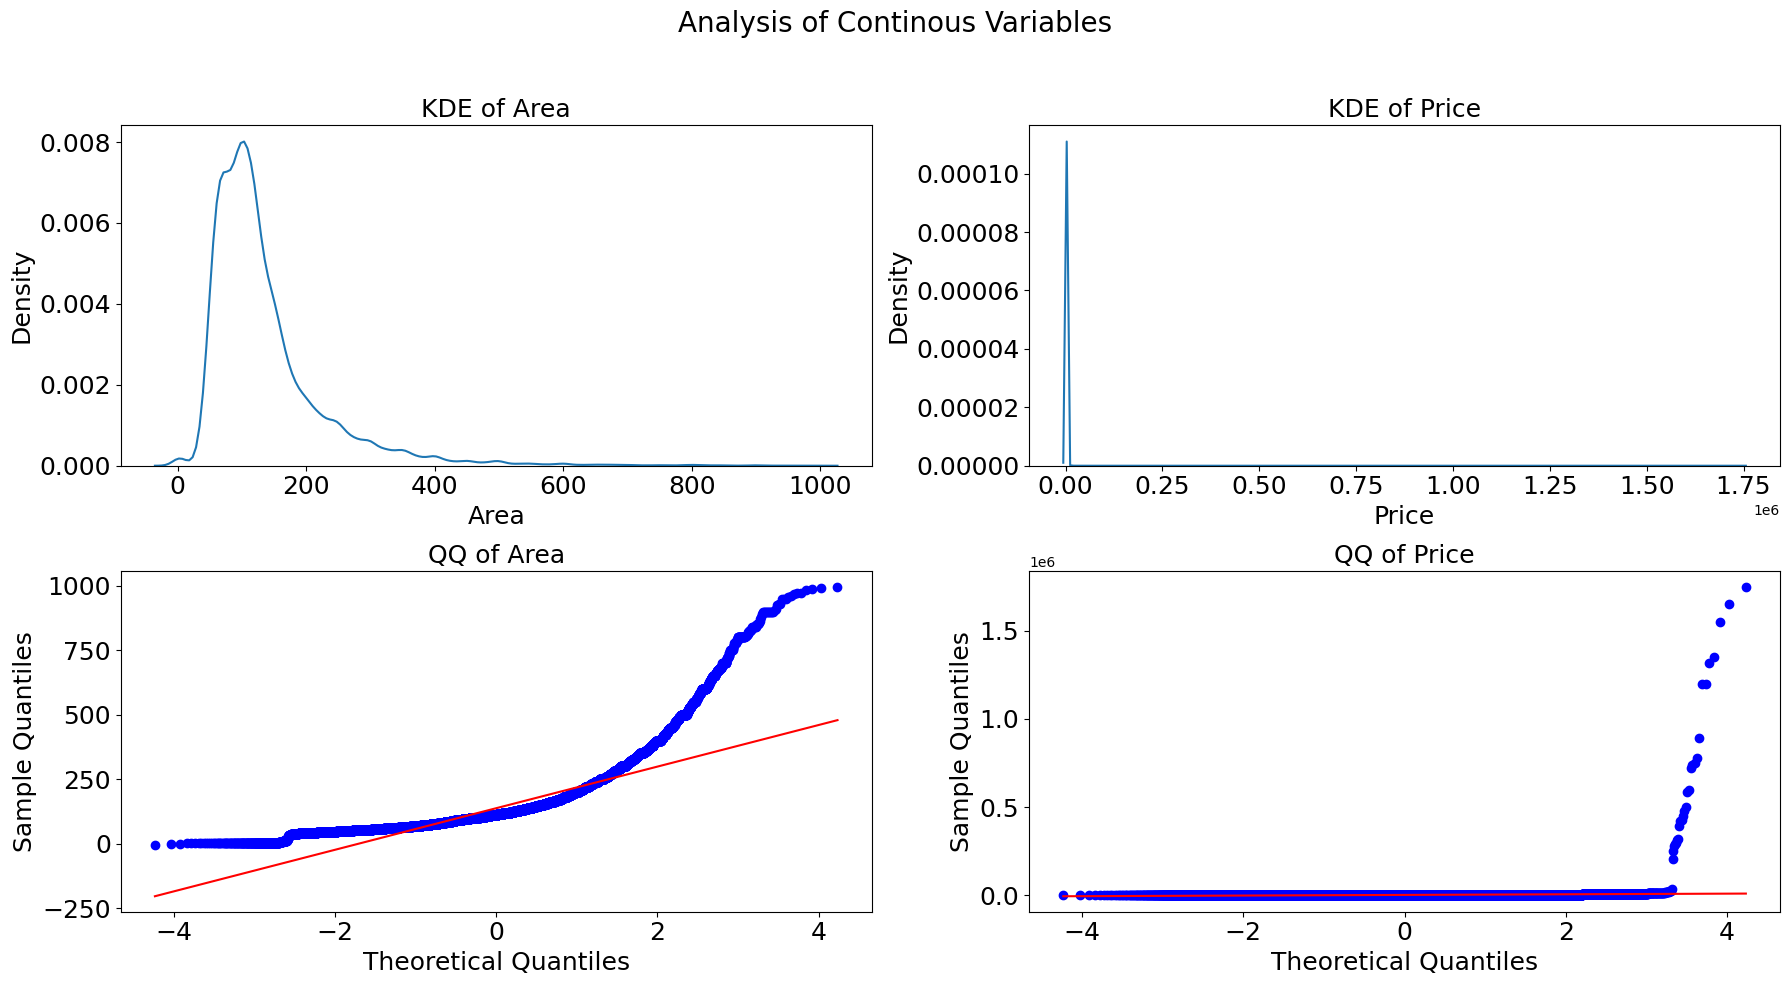

In [20]:
# Define tittle and subplots
fig, axes = plt.subplots(2, 2, figsize = (18, 10))  
plt.suptitle('Analysis of Continous Variables', fontsize = 20)

# KDE plot for Area
sns.kdeplot(data = df, x = 'Area', ax = axes[0,0])
axes[0,0].set_title('KDE of Area', fontsize = 18)
axes[0,0].set_xlabel('Area', fontsize = 18)  
axes[0,0].set_ylabel('Density', fontsize = 18)  
axes[0,0].tick_params(axis = 'x', labelsize = 18)
axes[0,0].tick_params(axis = 'y', labelsize = 18)

# QQ plot for Area
stats.probplot(df['Area'], dist = 'norm', plot = axes[1,0])
axes[1,0].set_title('QQ of Area', fontsize = 18)
axes[1,0].set_xlabel('Theoretical Quantiles', fontsize = 18)  
axes[1,0].set_ylabel('Sample Quantiles', fontsize = 18)  
axes[1,0].tick_params(axis = 'x', labelsize = 18)
axes[1,0].tick_params(axis = 'y', labelsize = 18)

# KDE plot for Price
sns.kdeplot(data = df, x = 'Price', ax = axes[0,1])
axes[0,1].set_title('KDE of Price', fontsize = 18)
axes[0,1].set_xlabel('Price', fontsize = 18)  
axes[0,1].set_ylabel('Density', fontsize = 18)  
axes[0,1].tick_params(axis = 'x', labelsize = 18)
axes[0,1].tick_params(axis = 'y', labelsize = 18)

# QQ plot for Price
stats.probplot(df['Price'], dist = 'norm', plot = axes[1,1])
axes[1,1].set_title('QQ of Price', fontsize = 18)
axes[1,1].set_xlabel('Theoretical Quantiles', fontsize = 18)  
axes[1,1].set_ylabel('Sample Quantiles', fontsize = 18)  
axes[1,1].tick_params(axis = 'x', labelsize = 18)
axes[1,1].tick_params(axis = 'y', labelsize = 18)

# Adjust layout
plt.tight_layout (rect=[0, 0, 1, 0.95])
plt.show()

* Both variables don't follow a normal distribution clearly, with a more noticiable presense of outliers in  price . Also, they have a high positive skew. 
* Hence, Price and Area were transformed with the methods nplog1 and QuantileTransformer.

### Non-Linear Transformations of Continous Variables

In [23]:
qt = QuantileTransformer(output_distribution = 'normal')

In [24]:
df['Area_transformed'] = qt.fit_transform(df[['Area']])
df['Price_transformed'] = qt.fit_transform(df[['Price']])

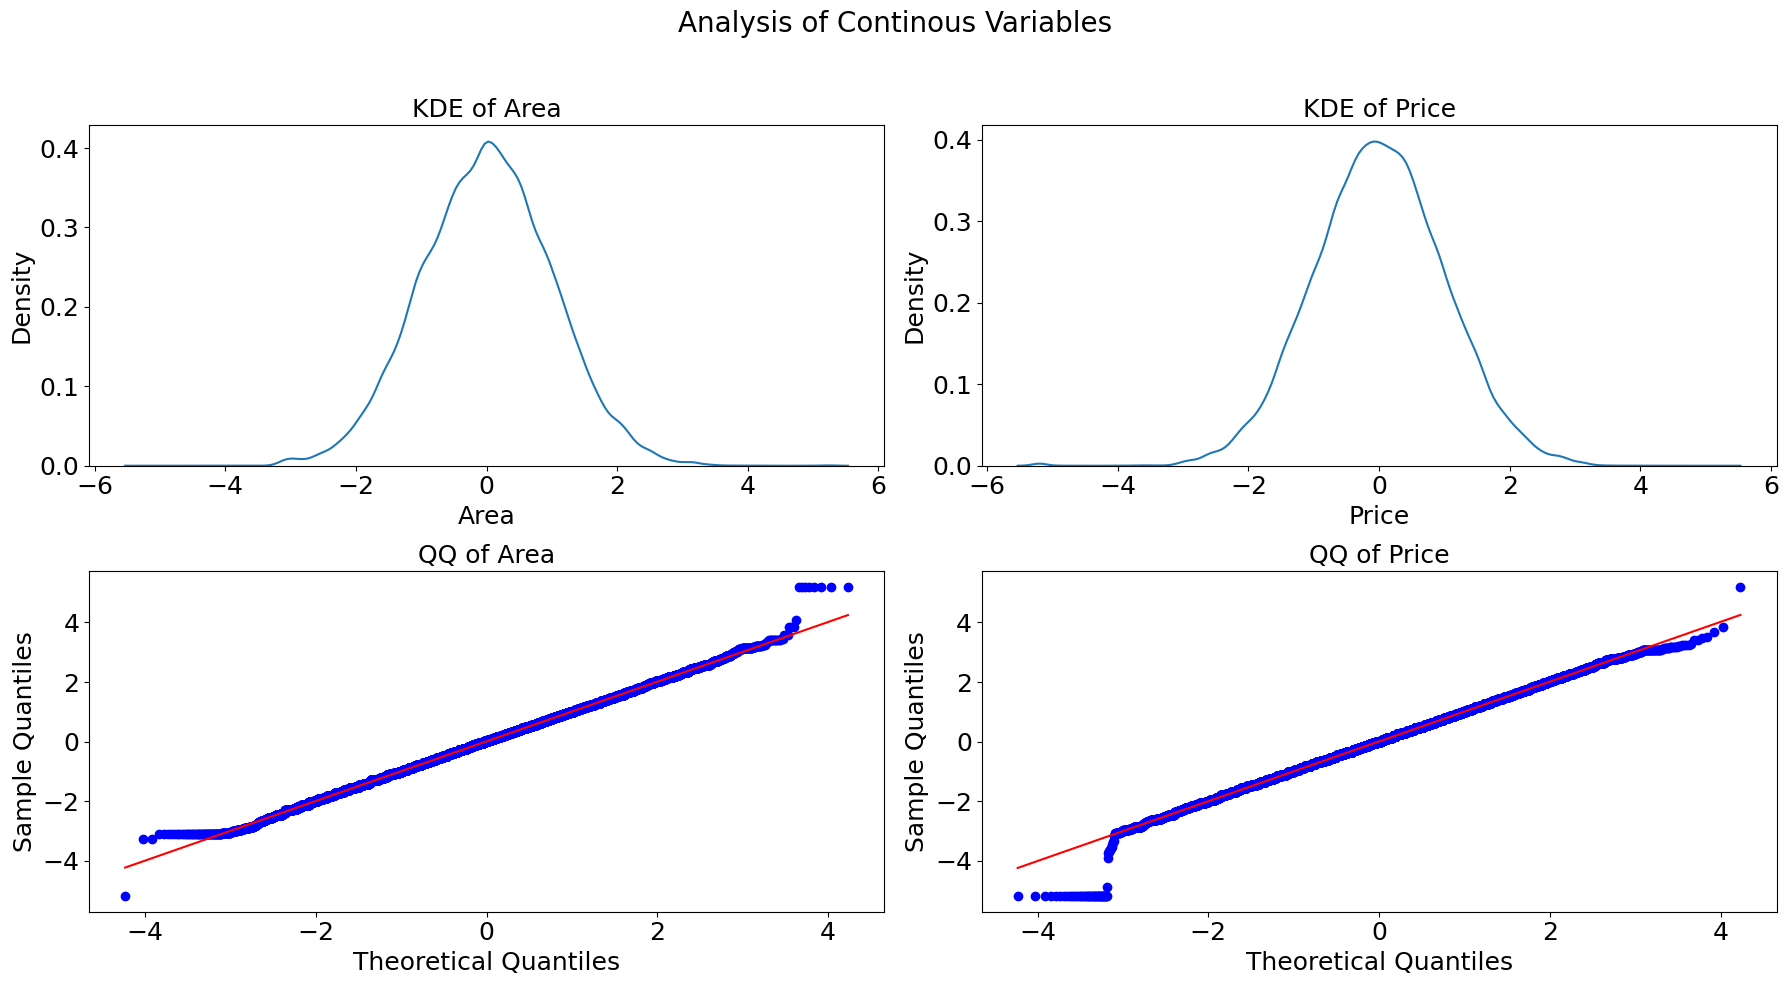

In [25]:
# Define title and subplots
fig, axes = plt.subplots(2, 2, figsize = (18, 10))  
plt.suptitle('Analysis of Continous Variables', fontsize = 20)

# KDE plot for Area
sns.kdeplot(data = df, x = 'Area_transformed', ax = axes[0,0])
axes[0,0].set_title('KDE of Area', fontsize = 18)
axes[0,0].set_xlabel('Area', fontsize = 18)  
axes[0,0].set_ylabel('Density', fontsize = 18)  
axes[0,0].tick_params(axis = 'x', labelsize = 18)
axes[0,0].tick_params(axis = 'y', labelsize = 18)

# QQ plot for Area
stats.probplot(df['Area_transformed'], dist = 'norm', plot = axes[1,0])
axes[1,0].set_title('QQ of Area', fontsize = 18)
axes[1,0].set_xlabel('Theoretical Quantiles', fontsize = 18)  
axes[1,0].set_ylabel('Sample Quantiles', fontsize = 18)  
axes[1,0].tick_params(axis = 'x', labelsize = 18)
axes[1,0].tick_params(axis = 'y', labelsize = 18)

# KDE plot for Price
sns.kdeplot(data = df, x = 'Price_transformed', ax = axes[0,1])
axes[0,1].set_title('KDE of Price', fontsize = 18)
axes[0,1].set_xlabel('Price', fontsize = 18)  
axes[0,1].set_ylabel('Density', fontsize = 18)  
axes[0,1].tick_params(axis = 'x', labelsize = 18)
axes[0,1].tick_params(axis = 'y', labelsize = 18)

# QQ plot for Price
stats.probplot(df['Price_transformed'], dist = 'norm', plot = axes[1,1])
axes[1,1].set_title('QQ of Price', fontsize = 18)
axes[1,1].set_xlabel('Theoretical Quantiles', fontsize = 18)  
axes[1,1].set_ylabel('Sample Quantiles', fontsize = 18)  
axes[1,1].tick_params(axis = 'x', labelsize = 18)
axes[1,1].tick_params(axis = 'y', labelsize = 18)

# Adjust layout
plt.tight_layout (rect=[0, 0, 1, 0.95])
plt.show()

* As explained in the sklearn documentation, this transformer is powerful to make features follow a normal distribution and reduce the impact of outliers. Nevertheless, could be noticed that there were still the presense of some of them in both data around the quantiles '-4' and '4'.

In [27]:
df['Area_transformed_log'] = np.log1p(df[['Area']])
df['Price_transformed_log'] = np.log1p(df[['Price']])

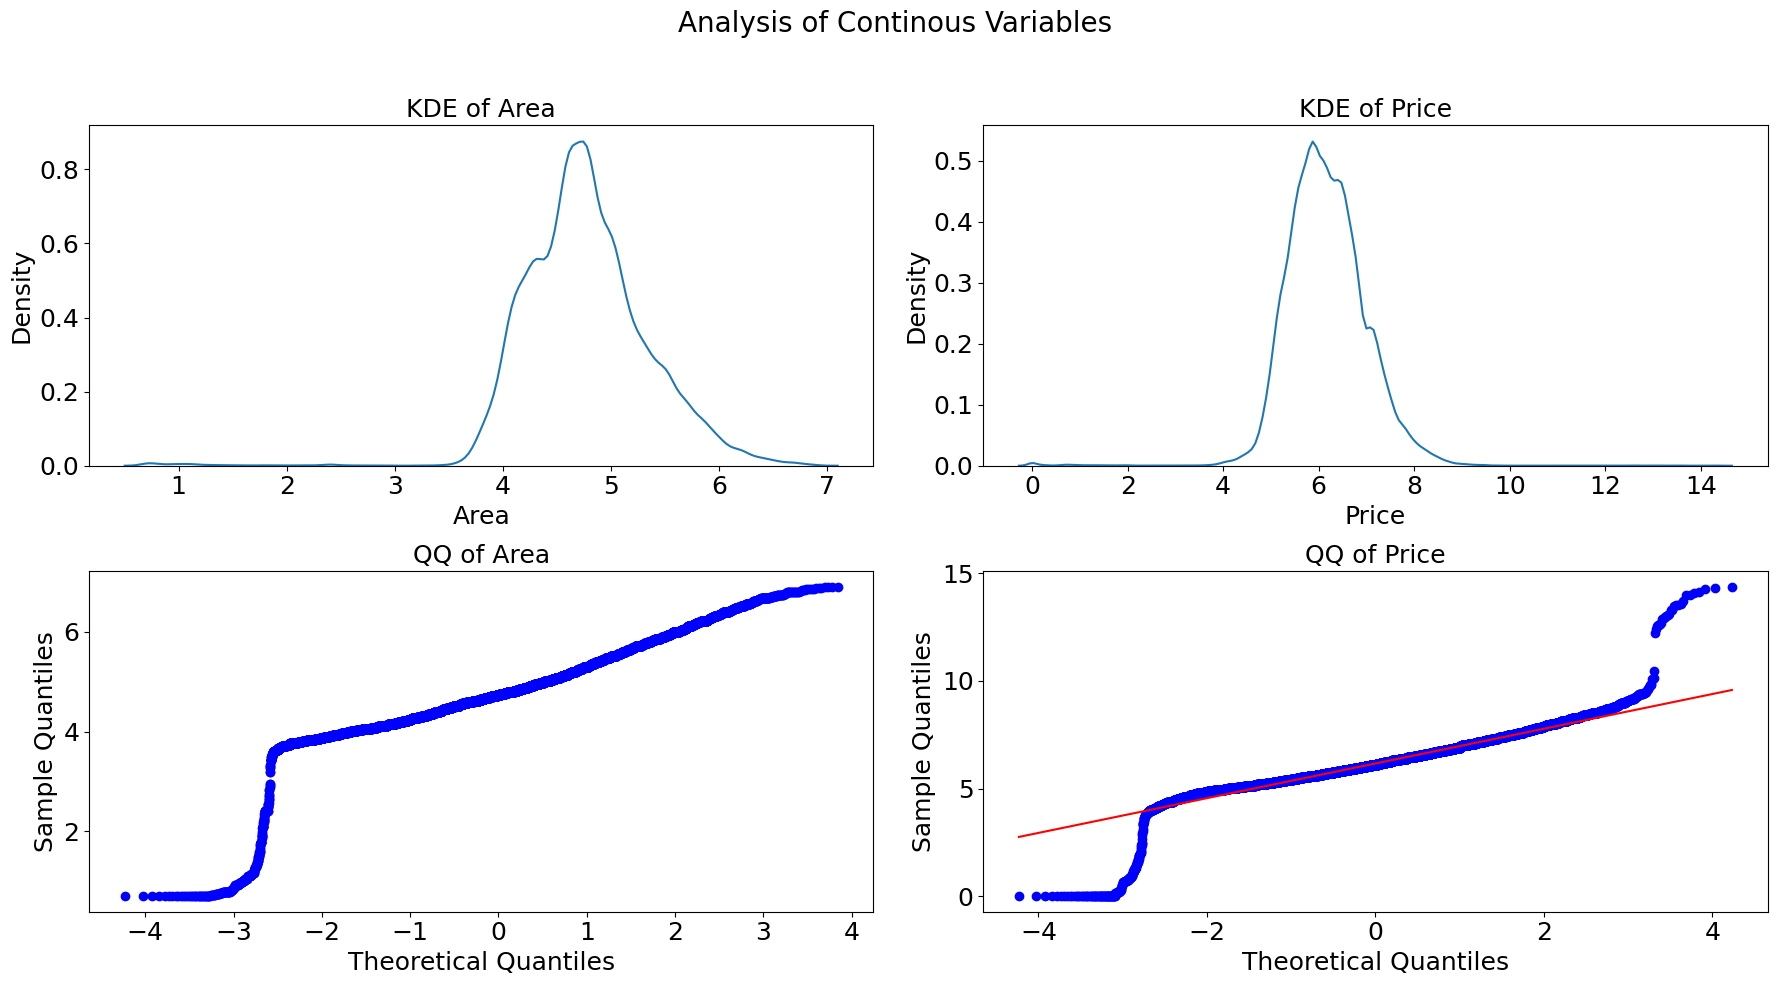

In [28]:
# Define title and subplots
fig, axes = plt.subplots(2, 2, figsize = (18, 10))  
plt.suptitle('Analysis of Continous Variables', fontsize = 20)

# KDE plot for Area
sns.kdeplot(data = df, x = 'Area_transformed_log', ax = axes[0,0])
axes[0,0].set_title('KDE of Area', fontsize = 18)
axes[0,0].set_xlabel('Area', fontsize = 18)  
axes[0,0].set_ylabel('Density', fontsize = 18)  
axes[0,0].tick_params(axis = 'x', labelsize = 18)
axes[0,0].tick_params(axis = 'y', labelsize = 18)

# QQ plot for Area
stats.probplot(df['Area_transformed_log'], dist = 'norm', plot = axes[1,0])
axes[1,0].set_title('QQ of Area', fontsize = 18)
axes[1,0].set_xlabel('Theoretical Quantiles', fontsize = 18)  
axes[1,0].set_ylabel('Sample Quantiles', fontsize = 18)  
axes[1,0].tick_params(axis = 'x', labelsize = 18)
axes[1,0].tick_params(axis = 'y', labelsize = 18)

# KDE plot for Price
sns.kdeplot(data = df, x = 'Price_transformed_log', ax = axes[0,1])
axes[0,1].set_title('KDE of Price', fontsize = 18)
axes[0,1].set_xlabel('Price', fontsize = 18)  
axes[0,1].set_ylabel('Density', fontsize = 18)  
axes[0,1].tick_params(axis = 'x', labelsize = 18)
axes[0,1].tick_params(axis = 'y', labelsize = 18)

# QQ plot for Price
stats.probplot(df['Price_transformed_log'], dist = 'norm', plot = axes[1,1])
axes[1,1].set_title('QQ of Price', fontsize = 18)
axes[1,1].set_xlabel('Theoretical Quantiles', fontsize = 18)  
axes[1,1].set_ylabel('Sample Quantiles', fontsize = 18)  
axes[1,1].tick_params(axis = 'x', labelsize = 18)
axes[1,1].tick_params(axis = 'y', labelsize = 18)

# Adjust layout
plt.tight_layout (rect=[0, 0, 1, 0.95])
plt.show()

* Compared to the previous method, the natural logaritm doesn't make at all both data more 'normal', but still it reduced the impacted of outliers. KDE Area plot still shows a long left tail and Price one a right one.
* Although it is less efective than QuantileTransformer, the logaritm technique has the advantage that is less difficult to interpret and easier to transform back in case it's necesary (execution of the np.exp1 function).

## Categorical variables

### Countplot Analysis 

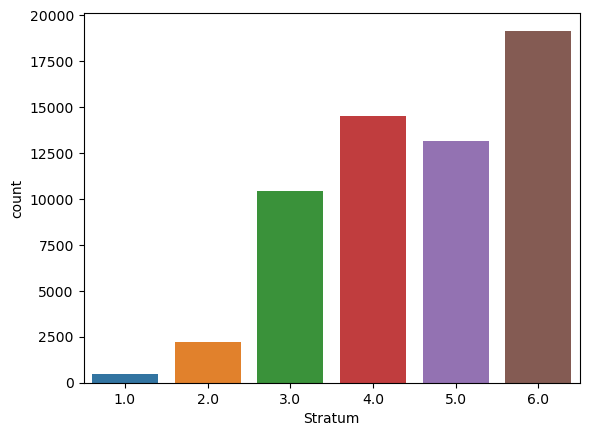

In [32]:
# Calling seaborn function for Stratum
sns.countplot(df, x = "Stratum")
plt.show()

* There are more offers of properties for wealthy income people (5 and 6) than for middle ones (3 and 4) or poverty ones (1 and 2)

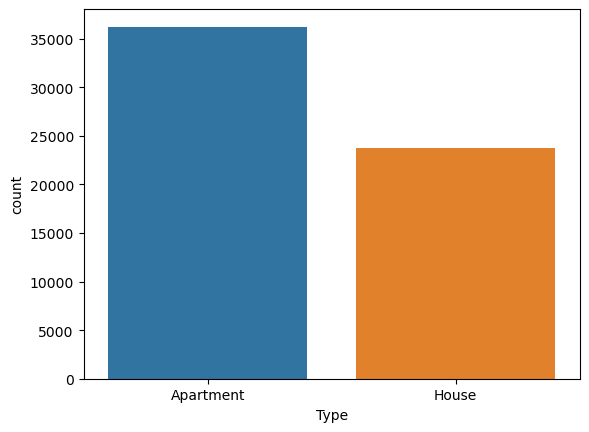

In [34]:
# Calling seaborn function
sns.countplot(df, x = "Type")
plt.show()

* There are more offers for apartments than for Houses. Nevertheless, for both of them there are more than 20000 offers.

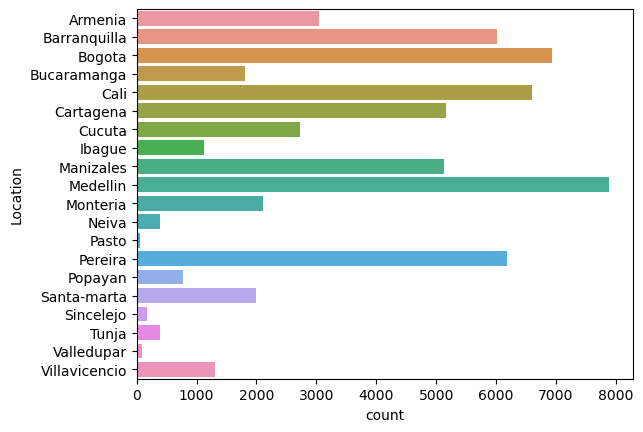

In [36]:
# Calling seaborn function
sns.countplot(df, y = "Location")
plt.show()

* For this dataset, there are more offers in a city that is not the Capital(Bogota). However, main cities like Cali, Barranquilla and Cartagena also have a good total of available properties.

### Pie Plot Analysis

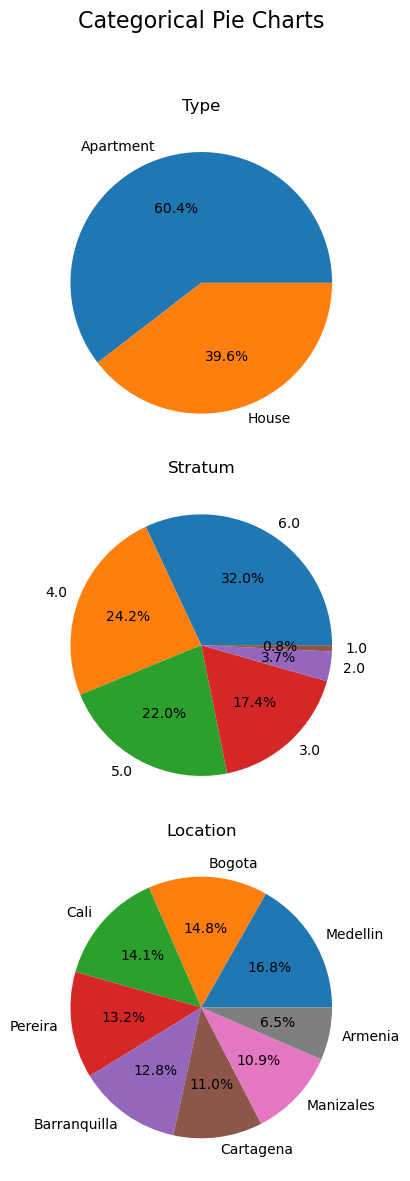

In [37]:
# Create title and subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 12))  
plt.suptitle('Categorical Pie Charts', fontsize=16)

# Pie chart for 'Type'
df['Type'].value_counts().plot.pie(ax = axes[0], autopct='%1.1f%%')
axes[0].set_title('Type')
axes[0].set_ylabel('') 

# Pie chart for 'Stratum'
df['Stratum'].value_counts().plot.pie(ax = axes[1], autopct='%1.1f%%')
axes[1].set_title('Stratum')
axes[1].set_ylabel('')  

# Keep only categories with > 5% of the total for visuability reasons
location_counts = df['Location'].value_counts()
location_percent = (location_counts / location_counts.sum()) * 100
filtered_location = location_counts[location_percent > 5]
filtered_location.plot.pie(ax= axes[2], autopct='%1.1f%%')
axes[2].set_title('Location')
axes[2].set_ylabel('')  


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* More than 50% of the total properties are apartments.
* There aren't a lot of buildings for  Stratums 1 and 2.
* Those 8 cities concentrate more than the 5% of the total offer, where Medellin is the place with the biggest availability of offers.

Overall, those graphs are another way to visualize the results from the barplot.

# Bivariate analysis

### Joint and Rel Plots Analysis

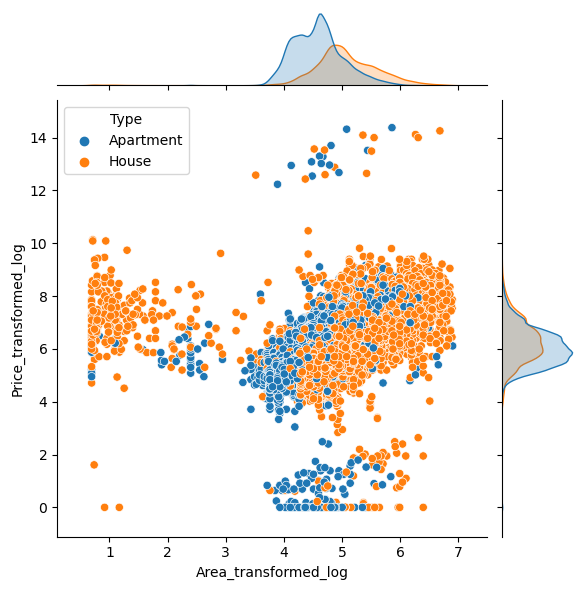

In [82]:
# Calling seaborn function for continous variables separated by Type category
sns.jointplot(data = df, x = 'Area_transformed_log', y = 'Price_transformed_log', hue = "Type")
plt.show()

There is a clear relationship between the Area of a property and its price, labeled in four potential zones:

* Zone 1 can be found in the center, where there is the biggest aglomerate of points, between the range of Area_transformed_log from 3.5 to 6.8 and Price log transformed from 4 to 9.5. 
* Zone 2 is above 1, and consists of properties of similar dimensions of 1 but way more expensives.
* Zone 3 is below 2, and is similar to  2 but here  are cheaper.
* Zone 4  consists of points between Area_transformed_log between 0.6 and 2.5 with prices similar of  1.

Finally, should be pointed that Houses are the majority in Zone 4, while in 3 the popular class are the Apartments.

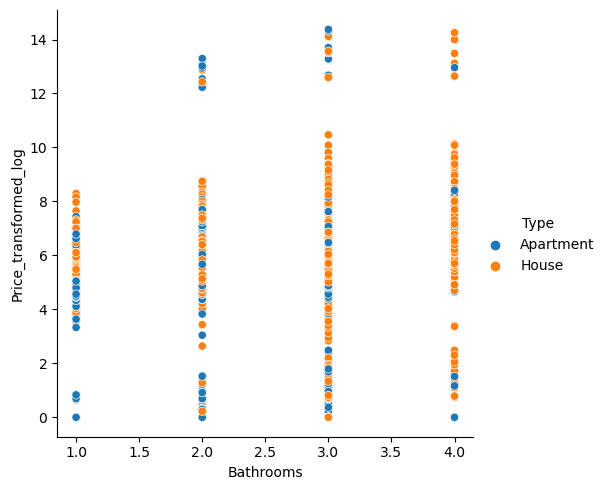

In [89]:
# Calling seaborn function for Price vs Bathrooms separated by Type category
sns.relplot(data = df, x = 'Bathrooms', y = 'Price_transformed_log', hue = "Type" )
plt.show()

* There isn't a clear relationship between the number of bathrooms and the Price of a property. 
* It is less frequent to find Apartments with a number of Bathrooms greater or equal than 3.

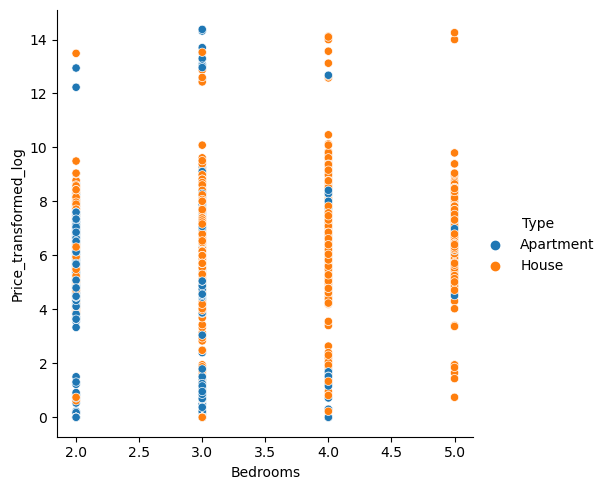

In [42]:
# Calling seaborn function for Price vs Bedrooms separated by Type category
sns.relplot(data = df, x = 'Bedrooms', y = 'Price_transformed_log', hue = "Type")

* Similar behaviour as in Bathrooms.
* In this case, is more common to find houses with a number of Bedrooms greater or equal than 4.

For all the results descrbied, the relationship between Area and Price was further studied, showed in the next plots.

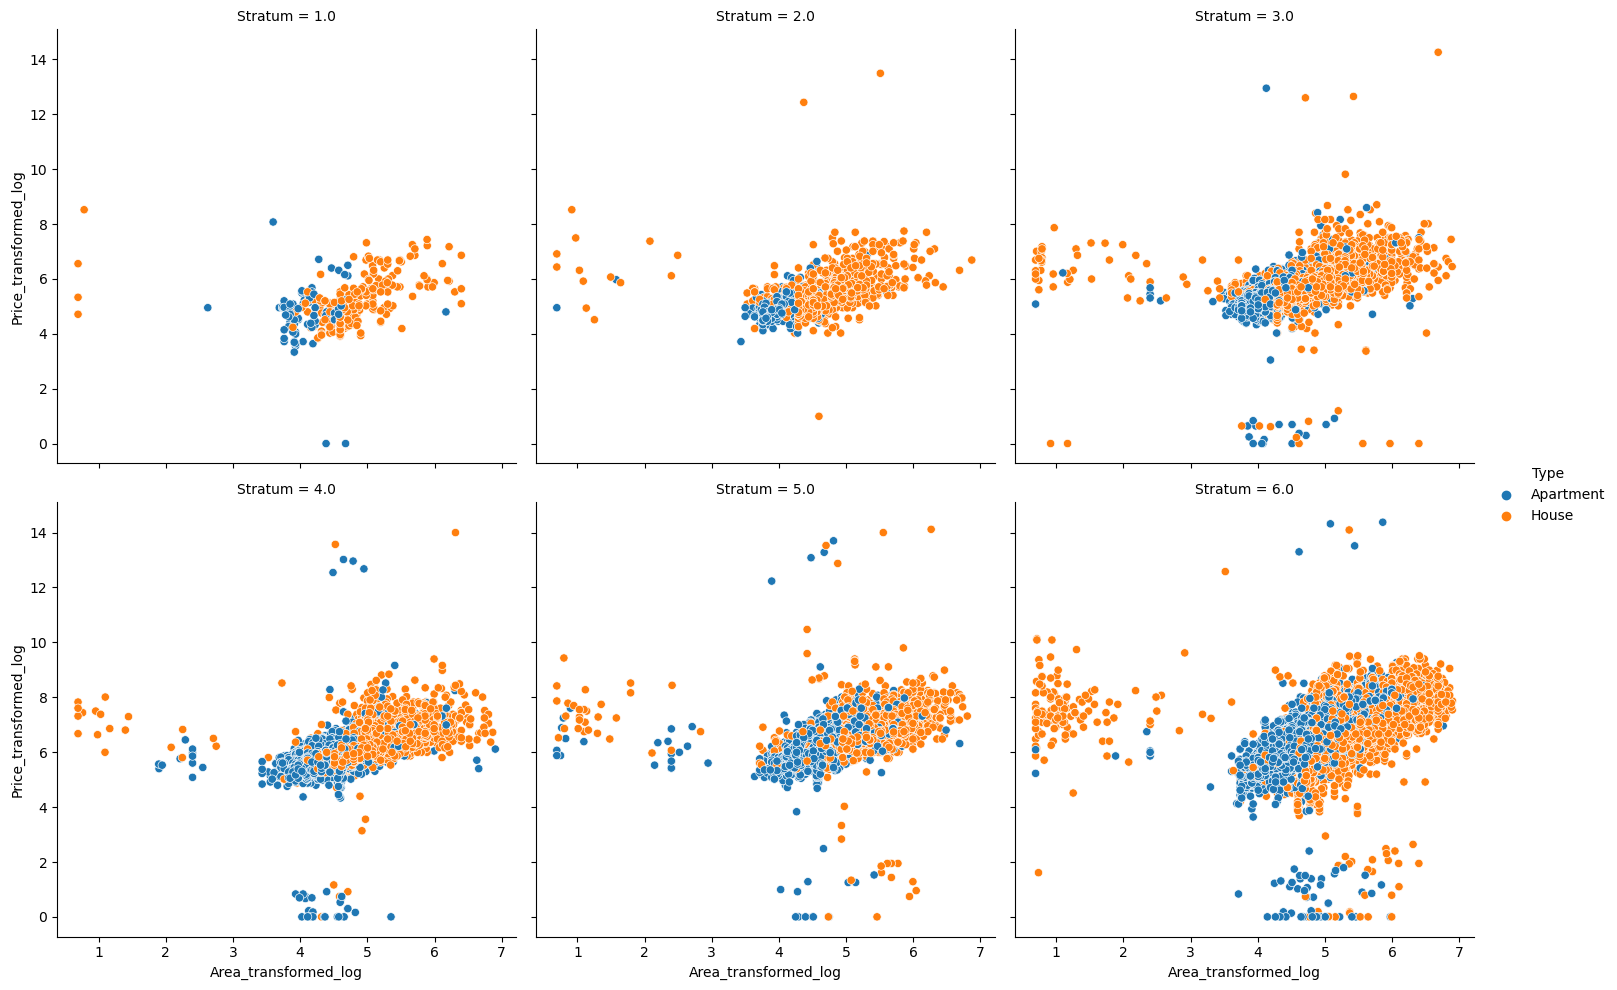

In [98]:
# Calling seaborn function for Price vs Area separated by Type and Stratum categories
sns.relplot(data = df, x = 'Area_transformed_log', y = 'Price_transformed_log', hue = "Type", col = 'Stratum', col_wrap = 3)
plt.show()

* Except for Stratum 1 and 2, all the zones are noticiable, but should be pointed that region 1 is present in all of them. 
* That means the higher the stratum, the higher availibility of different kind of properties. 
* Also, only from Stratum 4 started to appear several properties with Price_transformed log > 8 (the more expensive ones). 

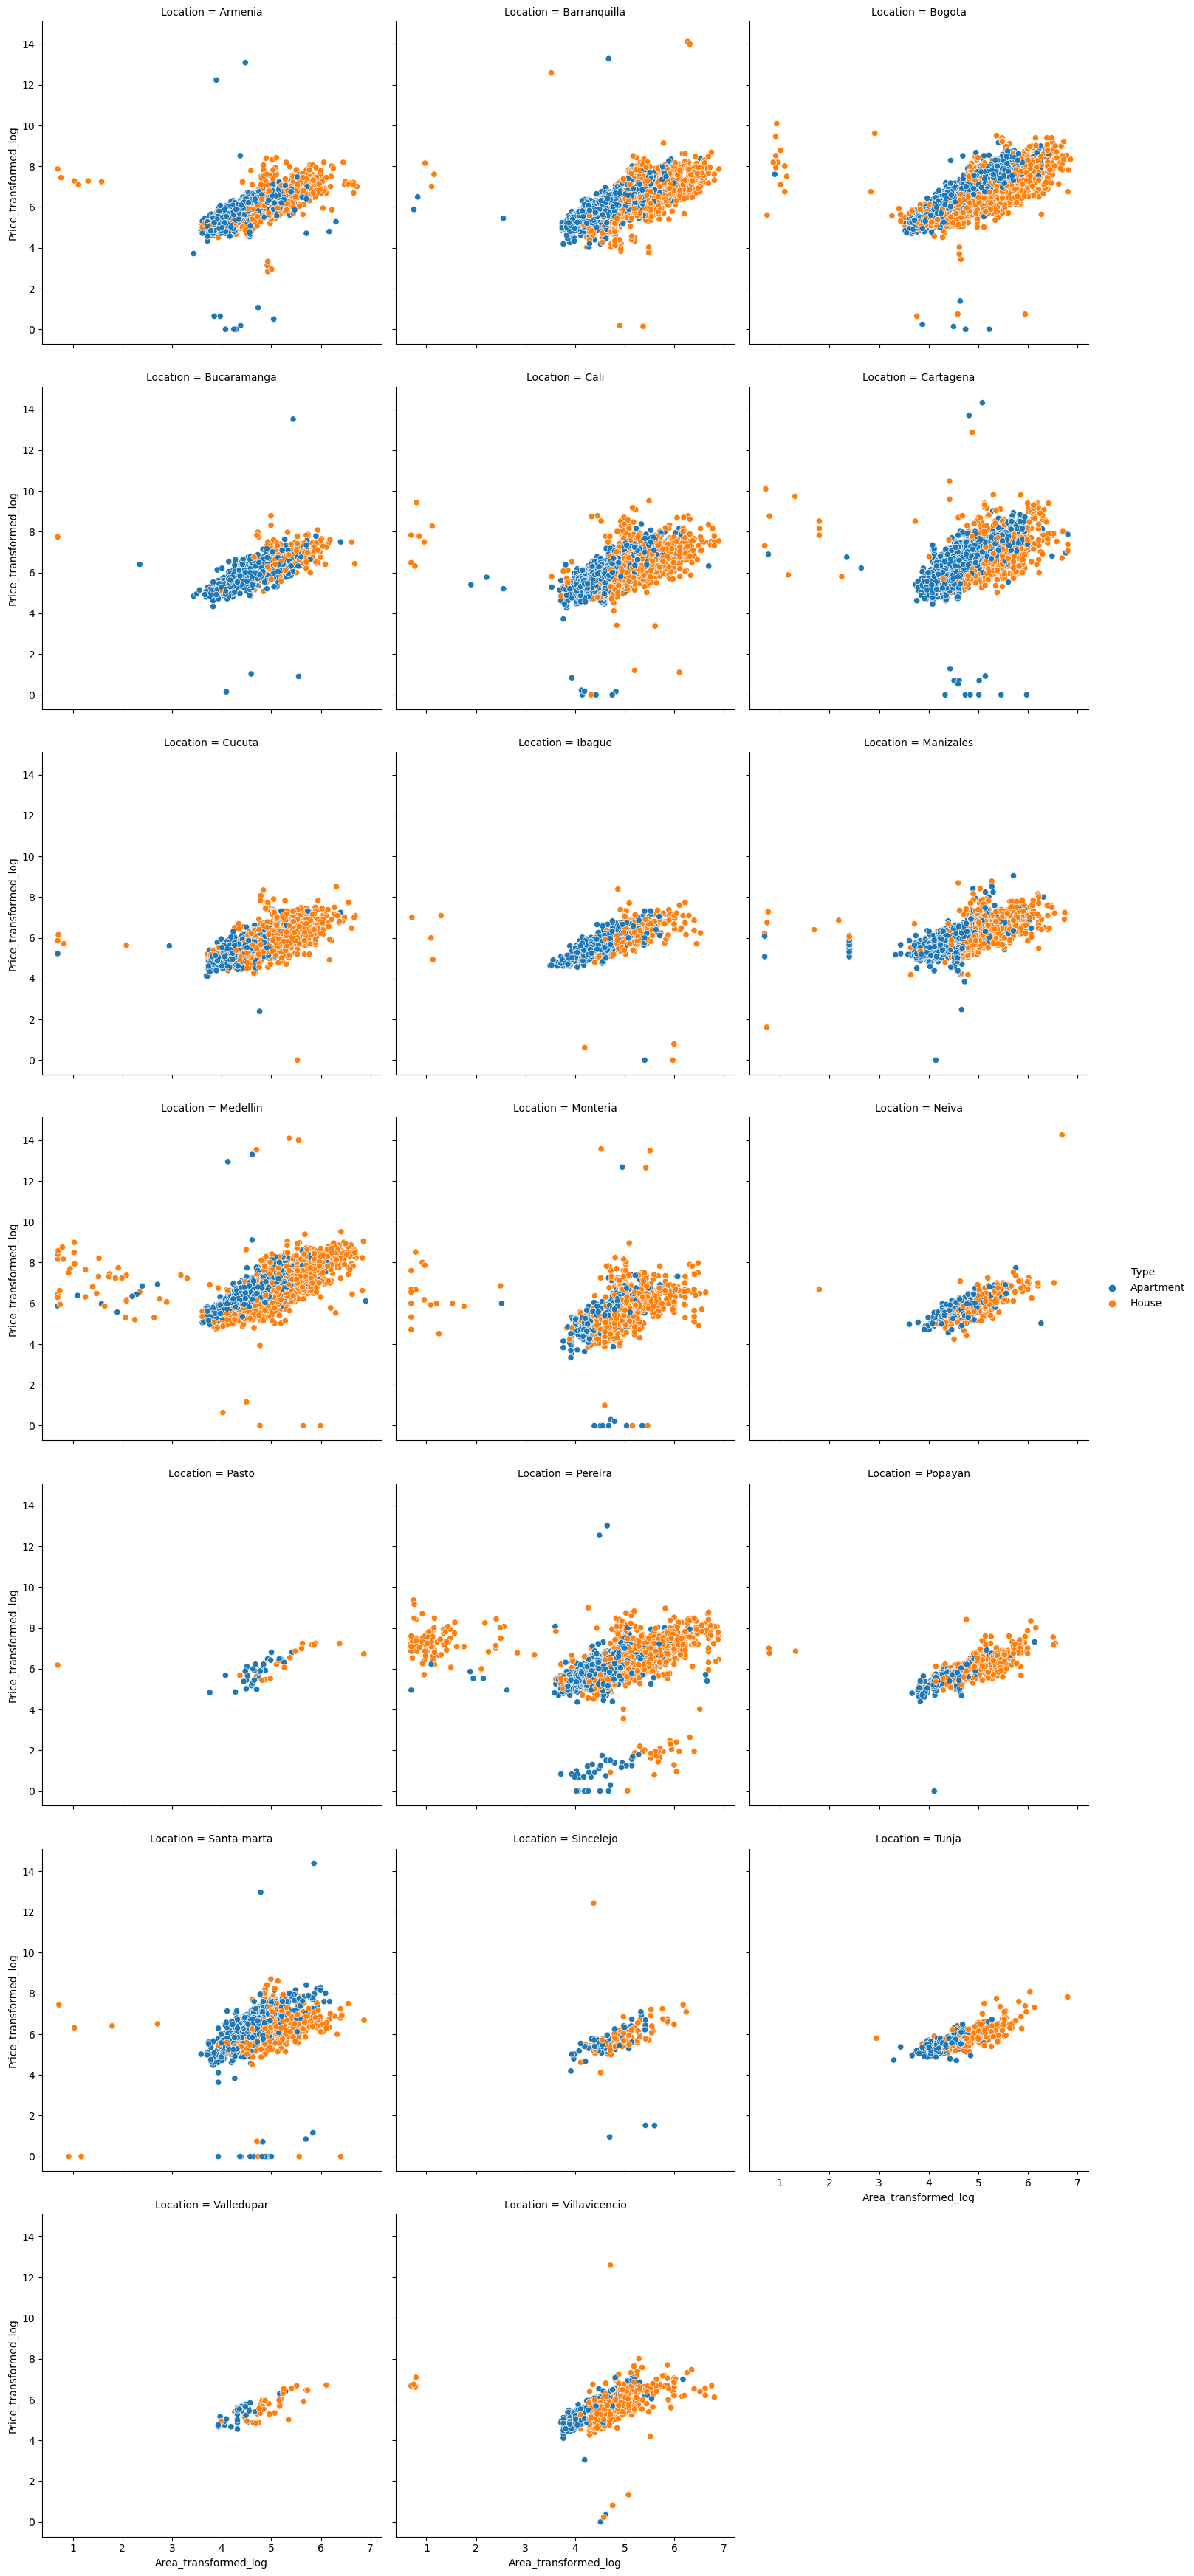

In [102]:
# Calling seaborn function for Price vs Area separated by Type and Location categories
sns.relplot(data = df, x = 'Area_transformed_log', y = 'Price_transformed_log', hue = "Type", col = 'Location', col_wrap = 3 )
plt.show()

* Barranquilla, Bogota, Cali, Cartagena, Medellin and Pereira are the cities where is possible to notice points of Price_transformed_log > 0.
* Pereira is  the city that concentrates most of the points from  Zone 3.
* Medellin and Pereira are the places that have most of the points from Zone 4.
* Zone 2 points are sporadic across all cities.

# Final considerations and saving Data for clustering

### Dropping innecesary columns

From the previous data analysis can be stated that is possible to label all the properties into a new category different from the ones present in the Dataset (this will be treated in the clustering section). Therefore all new columns created were dropped the log1p transformations and then the dataframe saved into a new csv file.

In [107]:
df.drop(columns = ['Price', 'Area', 'Price_transformed', 'Area_transformed'], inplace = True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59916 entries, 0 to 74426
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               59916 non-null  category
 1   Bedrooms               59916 non-null  int64   
 2   Bathrooms              59916 non-null  int64   
 3   Type                   59916 non-null  category
 4   Stratum                59916 non-null  category
 5   Area_transformed_log   59913 non-null  float64 
 6   Price_transformed_log  59916 non-null  float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 2.5 MB


### Saving data in a new csv file

In [111]:
df.to_csv('data_transformed.csv', index = False)